<a href="https://colab.research.google.com/github/giugnom3/Algorithms/blob/main/W3HW_Maria_Giugno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Wisconsin Dataset Exploration using Matplotlib and Seaborn**

**Imports and Setup**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 4)
sns.set_theme(style="whitegrid")

**Matplotlib Plots**

*Line Plot*

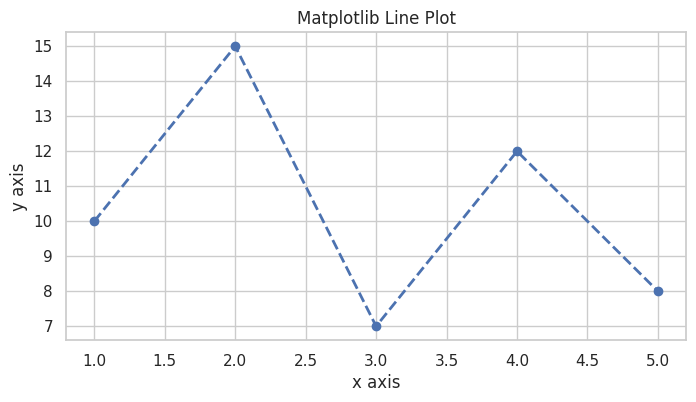

In [33]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 8]

plt.plot(x, y, marker="o", linestyle="--", linewidth=2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Matplotlib Line Plot")
plt.grid(True)
plt.show()

*Bar Chart*

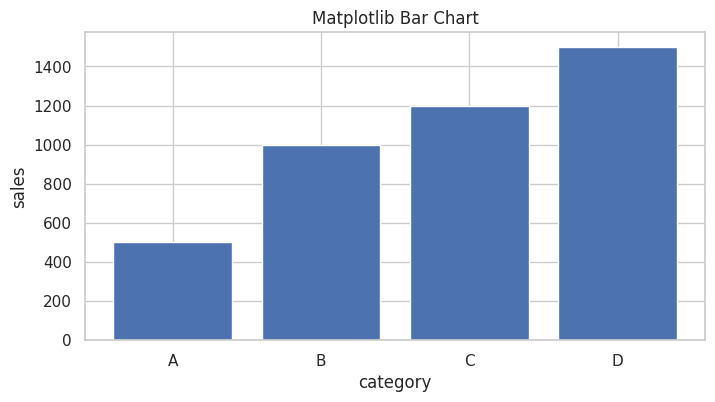

In [34]:
df = pd.DataFrame({
    "category": ["A", "B", "C", "D"],
    "sales": [500, 1000, 1200, 1500]
})

plt.bar(df["category"], df["sales"])
plt.xlabel("category")
plt.ylabel("sales")
plt.title("Matplotlib Bar Chart")
plt.show()

*Scatter Plot*

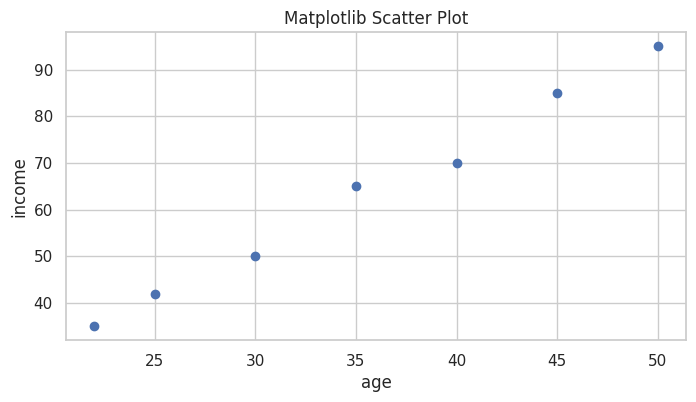

In [35]:
df2 = pd.DataFrame({
    "age": [22, 25, 30, 35, 40, 45, 50],
    "income": [35, 42, 50, 65, 70, 85, 95]
})

plt.scatter(df2["age"], df2["income"])
plt.xlabel("age")
plt.ylabel("income")
plt.title("Matplotlib Scatter Plot")
plt.grid(True)
plt.show()

*Histogram*

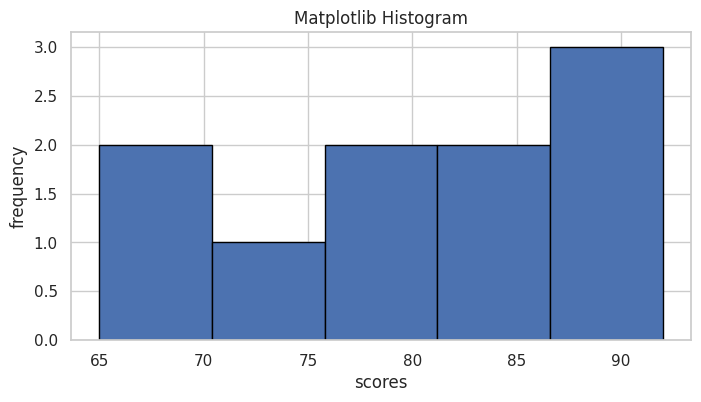

In [36]:
scores = [85, 78, 92, 65, 80, 75, 88, 90, 82, 70]

plt.hist(scores, bins=5, edgecolor="black")
plt.xlabel("scores")
plt.ylabel("frequency")
plt.title("Matplotlib Histogram")
plt.show()

*Boxplot*

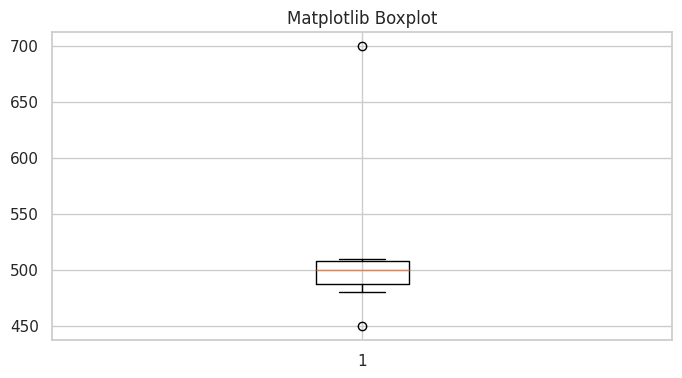

In [37]:
data = [450, 480, 500, 510, 495, 505, 700]
plt.boxplot(data)
plt.title("Matplotlib Boxplot")
plt.show()

**Seaborn Plots**

*Load Iris Dataset*

In [38]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


*Seaborn Scatter Plot*

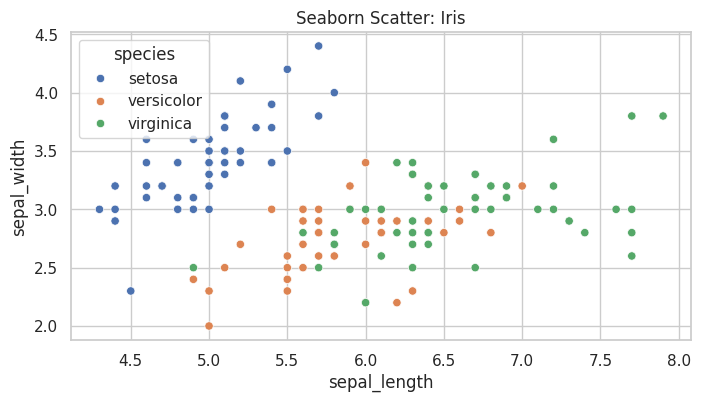

In [39]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.title("Seaborn Scatter: Iris")
plt.show()

*Tips Dataset + Bar Plot*

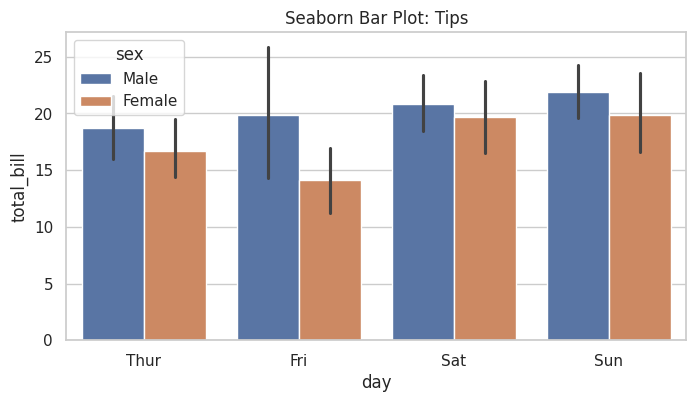

In [40]:
tips = sns.load_dataset("tips")

sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Seaborn Bar Plot: Tips")
plt.show()

*Seaborn Histogram (with KDE Curve)*

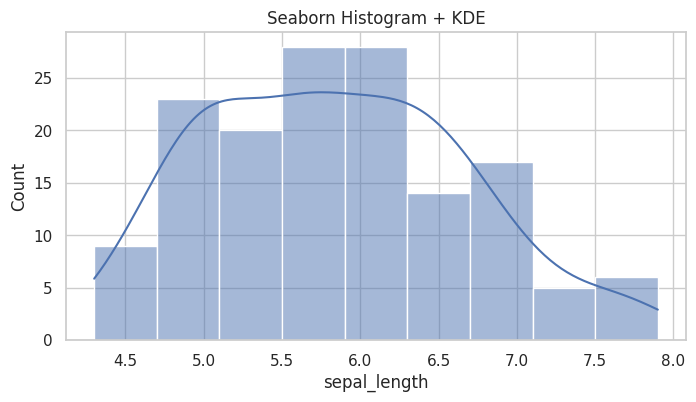

In [41]:
sns.histplot(data=iris, x="sepal_length", kde=True)
plt.title("Seaborn Histogram + KDE")
plt.show()

*Seaborn Boxplot*

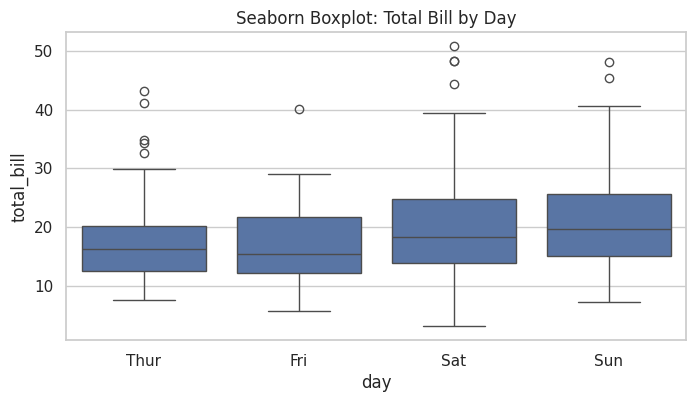

In [42]:
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Seaborn Boxplot: Total Bill by Day")
plt.show()

*Heatmap (Correlation)*

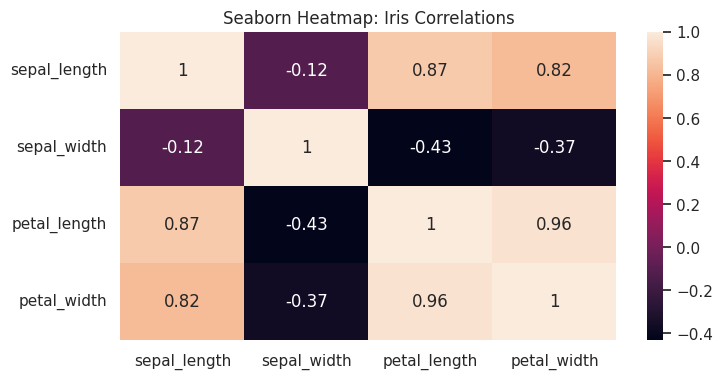

In [43]:
corr = iris.drop(columns=["species"]).corr(numeric_only=True)

sns.heatmap(corr, annot=True)
plt.title("Seaborn Heatmap: Iris Correlations")
plt.show()

**Dataset Experiment: Breast Cancer Wisconsin Data**

In [51]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer(as_frame=True)
df_full = bc.frame

df_full["diagnosis"] = df_full["target"].map({
    0: "Malignant",
    1: "Benign"
})

selected_columns = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension",
    "target",
    "diagnosis"
]

df = df_full[selected_columns]

df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0,Malignant


This dataset contains clinical measurements related to breast tumors.
The goal is to analyze relationships between fields like radius, texture, and smoothness and their tumor classification.





-----------------------------------------------------------------------

*Mean Radius Distribution Histogram*

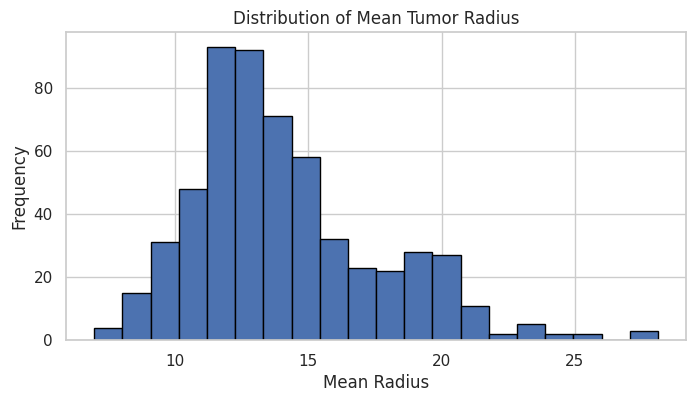

In [45]:
plt.hist(df["mean radius"], bins=20, edgecolor="black")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Tumor Radius")
plt.show()

-----------------------------------------------------------------------

*Compare Benign versus Malignant Boxplot*

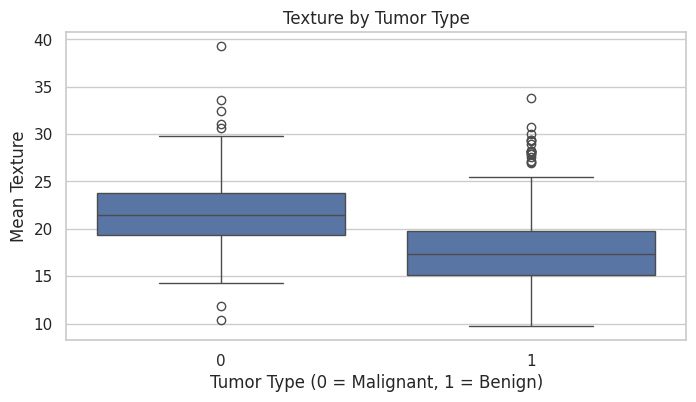

In [46]:





sns.boxplot(x=df["target"], y=df["mean texture"])
plt.xlabel("Tumor Type (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Texture")
plt.title("Texture by Tumor Type")
plt.show()







---





----------------------------------------------------------------------

*Compare Radius versus Texture Scatter Plot*

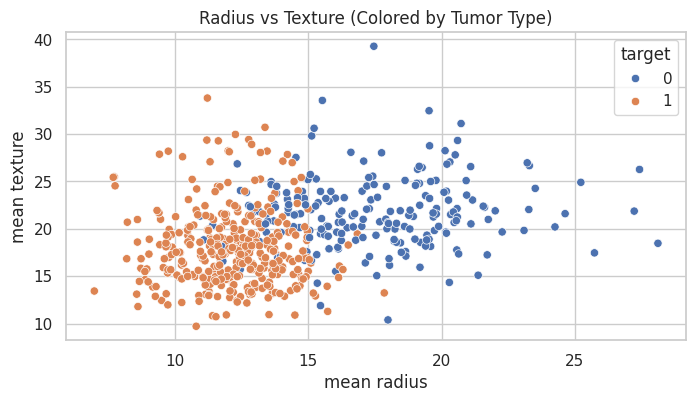

In [47]:




sns.scatterplot(
    data=df,
    x="mean radius",
    y="mean texture",
    hue="target"
)
plt.title("Radius vs Texture (Colored by Tumor Type)")
plt.show()

*Correlation Heatmap*

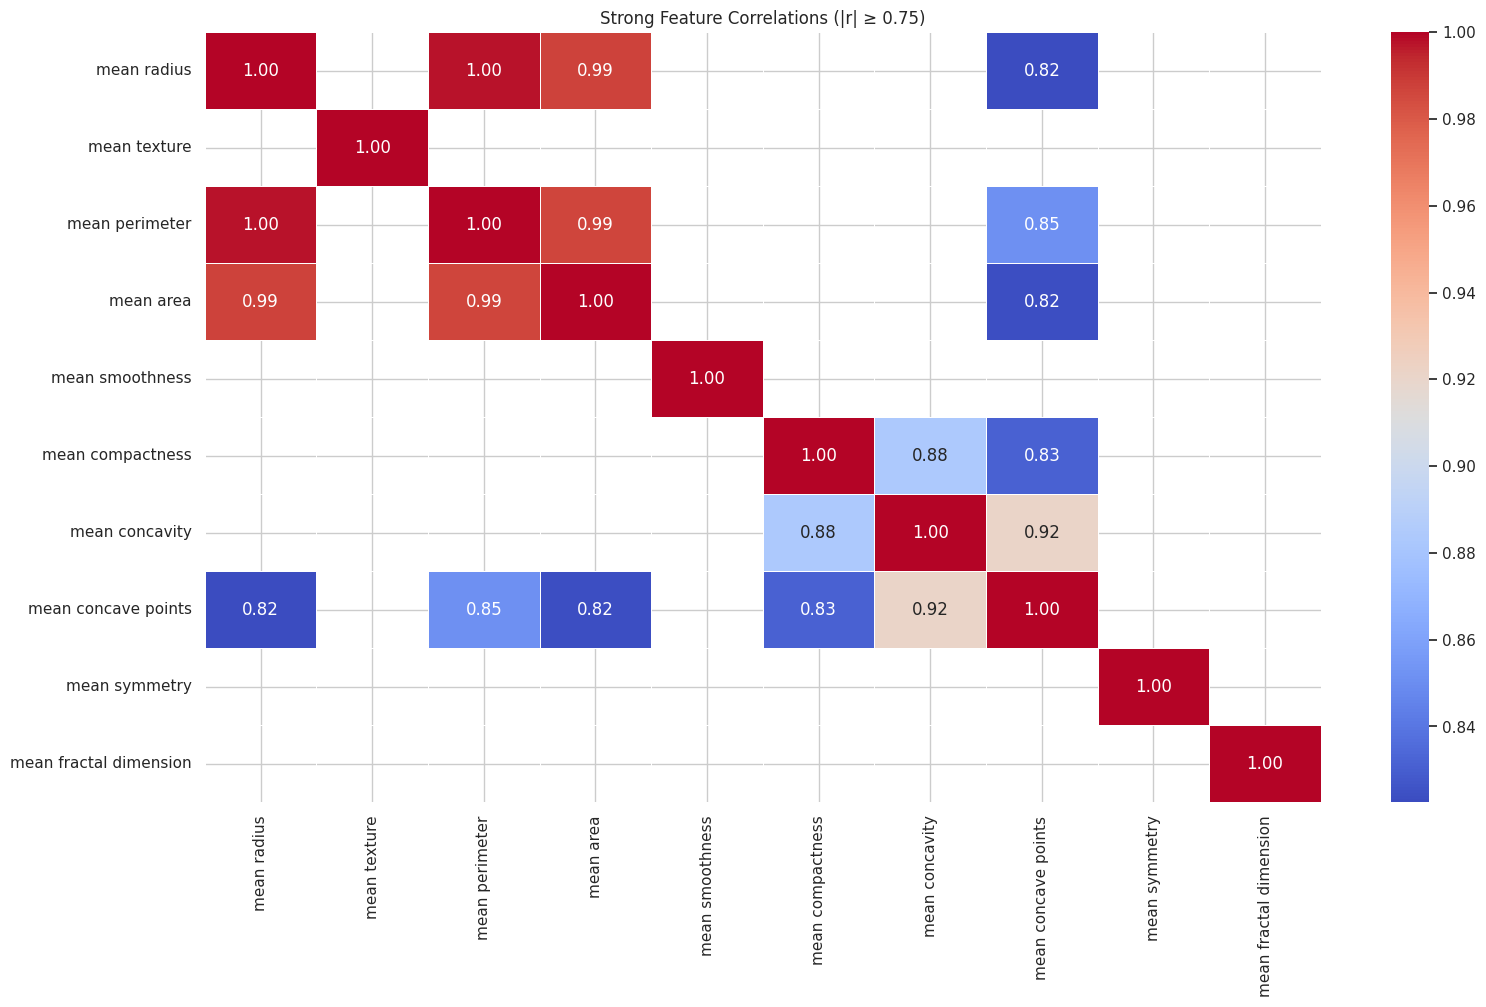

In [54]:
plt.figure(figsize=(18, 10))

corr = df.drop(columns=["target"]).corr(numeric_only=True)

mask = abs(corr) < 0.75

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Strong Feature Correlations (|r| ≥ 0.75)")
plt.show()











In [49]:





mean_radius_by_class = df.groupby("target")["mean radius"].mean()
print("Mean radius (0=malignant):", round(mean_radius_by_class[0], 2))
print("Mean radius (1=benign):", round(mean_radius_by_class[1], 2))

malignant_over_15 = (df[df["target"] == 0]["mean radius"] > 15).mean()
benign_over_15 = (df[df["target"] == 1]["mean radius"] > 15).mean()

print("Percent malignant with mean radius > 15:", round(malignant_over_15 * 100, 1), "%")
print("Percent benign with mean radius > 15:", round(benign_over_15 * 100, 1), "%")

corr = df.drop(columns=["target"]).corr(numeric_only=True)

pairs = [
    ("mean radius", "mean perimeter"),
    ("mean radius", "mean area"),
    ("mean perimeter", "mean area")
]

for a, b in pairs:
    print(f"corr({a}, {b}) =", round(corr.loc[a, b], 3))

def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

iqr_malignant = iqr(df[df["target"] == 0]["mean texture"])
iqr_benign = iqr(df[df["target"] == 1]["mean texture"])

print("IQR mean texture (0=malignant):", round(iqr_malignant, 2))
print("IQR mean texture (1=benign):", round(iqr_benign, 2))

Mean radius (0=malignant): 17.46
Mean radius (1=benign): 12.15
Percent malignant with mean radius > 15: 75.9 %
Percent benign with mean radius > 15: 3.4 %
corr(mean radius, mean perimeter) = 0.998
corr(mean radius, mean area) = 0.987
corr(mean perimeter, mean area) = 0.987
IQR mean texture (0=malignant): 4.44
IQR mean texture (1=benign): 4.61


*Comparison Pairplot*

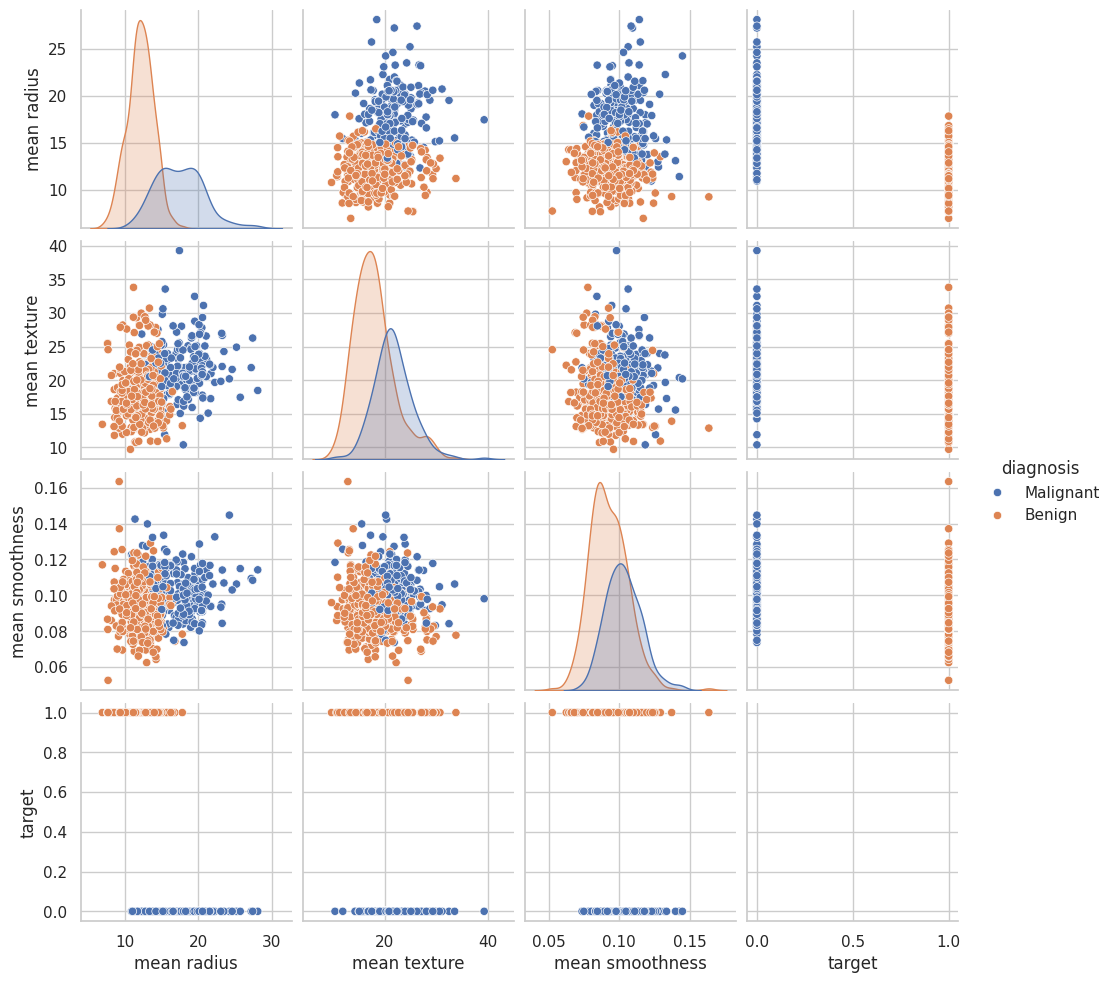

In [50]:





sns.pairplot(
    df[["mean radius", "mean texture", "mean smoothness", "target", "diagnosis"]],
    hue="diagnosis"
)
plt.show()



---





---



**Conclusion**

In this experiment, the Breast Cancer Wisconsin Dataset was explored using Matplotlib and Seaborn. Several visualizations were applied, including histograms, boxplots, scatter plots, and heatmaps.

The medical dataset revealed clear differences between benign and malignant tumors. Malignant tumors generally showed higher mean radius values, with many observations exceeding approximately 15, while benign tumors were more concentrated below this range. Additionally, the boxplot of mean texture showed comparable interquartile ranges, with malignant tumors exhibiting greater overall variability and slightly higher median values.

The correlation heatmap revealed strong positive correlations (near 0.9) between several features, particularly mean radius, perimeter, and area. This suggests that these variables increase together and may serve as important indicators in tumor classification tasks. Overall, these visualizations demonstrate how exploratory data analysis helps identify patterns, relationships, and potential predictive features before applying machine learning or statistical models.


**Mean Radius**
- Malignant ≈ 17.46  
- Benign ≈ 12.15  

**Percent Above Threshold**
- 75.9% malignant  
- 3.4% benign  

**Correlations**
- Mean radius ↔ Mean perimeter ≈ 0.998  
- Mean radius ↔ Mean area ≈ 0.987  
